In [14]:
from django.core.management import setup_environ
import settings
setup_environ(settings)

'/home/wahern/projects/millstone/genome_designer'

In [112]:
import genome_finish.assembly
import os
from main.models import ReferenceGenome
from main.models import ExperimentSampleToAlignment
from main.models import Contig

In [137]:
def test_velvet_opts(velvet_opts):
    
    genome_finishing_dir = ('/home/wahern/projects/millstone/genome_designer/' +
            'temp_data/projects/77e6b3d5/alignment_groups/7700976a/' +
            'sample_alignments/d25857af/genome_finishing')
    
#   sv_indicants_bam = os.path.join(genome_finishing_dir, '2/bwa_align.SV_indicants_with_pairs.bam')
    sv_indicants_bam = os.path.join(genome_finishing_dir, '19/bwa_align.SV_indicants_with_pairs.bam')
    
    
    experiment_sample_to_alignment = ExperimentSampleToAlignment.objects.get(uid='d25857af')
    reference_genome = experiment_sample_to_alignment.alignment_group.reference_genome
    contig_label_base = '_'.join(
            [reference_genome.label, experiment_sample_to_alignment.experiment_sample.label])
    
    data_dir = os.path.join(genome_finishing_dir, '0')
    data_dir_counter = 0
    while(os.path.exists(data_dir)):
        data_dir_counter += 1
        data_dir = os.path.join(genome_finishing_dir, str(data_dir_counter))
    os.mkdir(data_dir)
    
    initial_contigs = Contig.objects.filter(parent_reference_genome=reference_genome)
    initial_contigs_uids = [c.uid for c in initial_contigs]
    
    contig_files = genome_finish.assembly.assemble_with_velvet(
            data_dir, velvet_opts, sv_indicants_bam,
            reference_genome, experiment_sample_to_alignment,
            contig_label_base)
    
    created_contigs = Contig.objects.filter(parent_reference_genome=reference_genome).exclude(
            uid__in=initial_contigs_uids)
    
    print "%i contigs found\n" % (created_contigs.count())
    
    return {
            'contig_files': contig_files,
            'created_contigs': created_contigs,
            'data_dir_number': data_dir_counter
    }

In [106]:
velvet_opts = {
    'velveth': {
        'shortPaired': ''
    },
    'velvetg': {
        'cov_cutoff': 20
    }
}

test_velvet_opts(velvet_opts)

983 contigs found



{'contig_files': ['/home/wahern/projects/millstone/genome_designer/temp_data/projects/77e6b3d5/alignment_groups/7700976a/sample_alignments/d25857af/genome_finishing/20/velvet_k21/contigs.fa'],
 'created_contigs': [<Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, '...(remaining elements truncated)...']}

In [37]:
%matplotlib inline

In [38]:
import matplotlib.pyplot as plt
import numpy as np

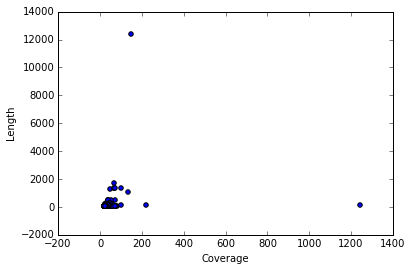

In [69]:
contigs = Out[41]['created_contigs']

coverage = []
length = []
for c in contigs:
    coverage.append(c.coverage)
    length.append(c.num_bases)

plt.scatter(coverage, length)
plt.xlabel('Coverage')
plt.ylabel('Length')

In [59]:
outliers = []
outliers.append(coverage.index(max(coverage)))
outliers.append(length.index(max(length)))

coverage_filt = coverage[:]
length_filt = length[:]
for i in sorted(outliers, reverse=True):
    del coverage_filt[i]
    del length_filt[i]

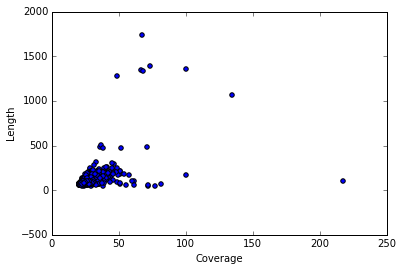

In [68]:
plt.scatter(coverage_filt, length_filt)
plt.xlabel('Coverage')
plt.ylabel('Length')

(array([ 623.,  231.,   69.,   28.,   11.,    3.,    3.,    6.,    2.,
           1.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([  20.166666 ,   26.7513545,   33.336043 ,   39.9207315,
          46.50542  ,   53.0901085,   59.674797 ,   66.2594855,
          72.844174 ,   79.4288625,   86.013551 ,   92.5982395,
          99.182928 ,  105.7676165,  112.352305 ,  118.9369935,
         125.521682 ,  132.1063705,  138.691059 ,  145.2757475,
         151.860436 ,  158.4451245,  165.029813 ,  171.6145015,
         178.19919  ,  184.7838785,  191.368567 ,  197.9532555,
         204.537944 ,  211.1226325,  217.707321 ]),
 <a list of 30 Patch objects>)

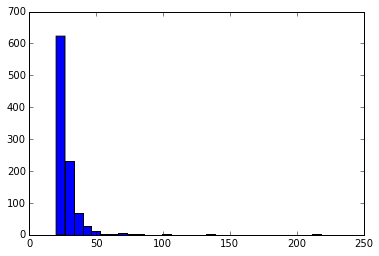

In [64]:
plt.hist(coverage_filt, bins=30)

In [104]:
velvet_opts_2 = {
    'velveth': {
        'shortPaired': ''
    },
    'velvetg': {
        'cov_cutoff': 30,
        'ins_length': 200,
        'ins_length_sd': 90
    }
}

test_velvet_opts(velvet_opts_2)

0 contigs found



{'contig_files': None, 'created_contigs': []}

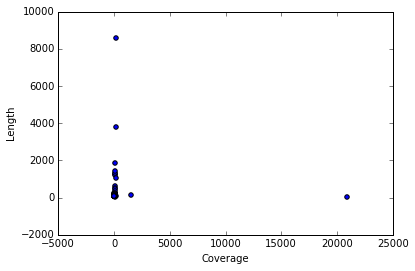

In [74]:
contigs = Out[72]['created_contigs']

coverage = []
length = []
for c in contigs:
    coverage.append(c.coverage)
    length.append(c.num_bases)

plt.scatter(coverage, length)
plt.xlabel('Coverage')
plt.ylabel('Length')

In [75]:
max(coverage)

20883.541016

In [81]:
reload(genome_finish)

NameError: name 'genome_finish' is not defined

In [82]:
%load_ext autoreload

In [83]:
%autoreload 2

In [97]:
import genome_finish.assembly

In [91]:
reload(genome_finish)

<module 'genome_finish' from 'genome_finish/__init__.pyc'>

In [92]:
reload(genome_finish.assembly)

<module 'genome_finish.assembly' from 'genome_finish/assembly.pyc'>

In [108]:
clipped_reads_bam = ('/home/wahern/projects/millstone/genome_designer/' +
            'temp_data/projects/77e6b3d5/alignment_groups/7700976a/' +
            'sample_alignments/d25857af/genome_finishing/19/bwa_align.clipped.bam')
reference_genome = ReferenceGenome.objects.get(project__title='recoli_insertion_testing', label='mg1655')
genome_finish.assembly.add_bam_track(reference_genome, clipped_reads_bam, 'clipped_t14')

In [110]:
contig = Contig.objects.get(parent_reference_genome__label='50kb_ref')


In [114]:
velvet_opts_2 = {
    'velveth': {
        'shortPaired': ''
    },
    'velvetg': {
        'cov_cutoff': 30,
        'ins_length': 144,
        'ins_length_sd': 44
    }
}

test_velvet_opts(velvet_opts_2)

200 contigs found



{'contig_files': ['/home/wahern/projects/millstone/genome_designer/temp_data/projects/77e6b3d5/alignment_groups/7700976a/sample_alignments/d25857af/genome_finishing/21/velvet_k21/contigs.fa'],
 'created_contigs': [<Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, '...(remaining elements truncated)...']}

In [115]:
velvet_opts_3 = {
    'velveth': {
        'shortPaired': ''
    },
    'velvetg': {
        'exp_cov': 'auto',
        'cov_cutoff': 30,
        'ins_length': 144,
        'ins_length_sd': 44
    }
}

test_velvet_opts(velvet_opts_3)

200 contigs found



{'contig_files': ['/home/wahern/projects/millstone/genome_designer/temp_data/projects/77e6b3d5/alignment_groups/7700976a/sample_alignments/d25857af/genome_finishing/22/velvet_k21/contigs.fa'],
 'created_contigs': [<Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, '...(remaining elements truncated)...']}

In [120]:
contigs = Contig.objects.filter(parent_reference_genome=reference_genome)
coverage = []
length = []
for c in contigs:
    coverage.append(c.coverage)
    length.append(c.num_bases)

plt.scatter(coverage, length)
plt.xlabel('Coverage')
plt.ylabel('Length')

ValueError: could not convert string to float: 

ValueError: could not convert string to float: 

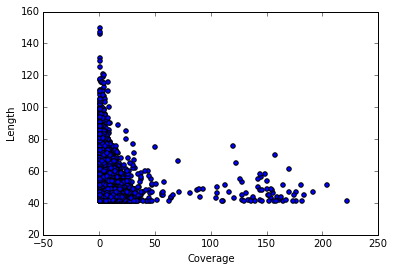

In [126]:
plt.scatter(coverage[0:10000], length[0:10000])
plt.xlabel('Coverage')
plt.ylabel('Length')

(array([  2.03587000e+05,   2.00850000e+05,   7.71210000e+04,
          1.35220000e+04,   3.41400000e+03,   1.83200000e+03,
          9.12000000e+02,   4.39000000e+02,   4.60000000e+02,
          1.33000000e+02,   1.45000000e+02,   1.73000000e+02,
          1.13000000e+02,   0.00000000e+00,   4.60000000e+01,
          9.70000000e+01,   9.30000000e+01,   0.00000000e+00,
          1.39000000e+02,   8.20000000e+01,   9.80000000e+01,
          1.84000000e+02,   1.95000000e+02,   1.29000000e+02,
          1.69000000e+02,   2.94000000e+02,   2.57000000e+02,
          3.20000000e+02,   2.84000000e+02,   1.79000000e+02,
          1.50000000e+02,   1.74000000e+02,   9.20000000e+01,
          4.50000000e+01,   4.70000000e+01,   0.00000000e+00,
          5.10000000e+01,   0.00000000e+00,   0.00000000e+00,
          4.10000000e+01]),
 array([   1.        ,    6.53095245,   12.0619049 ,   17.59285735,
          23.1238098 ,   28.65476225,   34.1857147 ,   39.71666715,
          45.2476196 ,   50.77

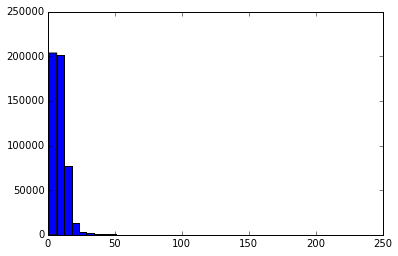

In [131]:
plt.hist(coverage[0:10000], weights=length[0:10000], bins=40)

In [133]:
sorted(length)[0:10]

[0L, 41L, 41L, 41L, 41L, 41L, 41L, 41L, 41L, 41L]

In [136]:
velvet_opts_5 = {
    'velveth': {
        'shortPaired': ''
    },
    'velvetg': {
        'read_trkg': 'yes',
        'cov_cutoff': 30,
        'ins_length': 144,
        'ins_length_sd': 44
    }
}

test_velvet_opts(velvet_opts_5)

200 contigs found



{'contig_files': ['/home/wahern/projects/millstone/genome_designer/temp_data/projects/77e6b3d5/alignment_groups/7700976a/sample_alignments/d25857af/genome_finishing/28/velvet_k21/contigs.fa'],
 'created_contigs': [<Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, <Contig: Contig object>, '...(remaining elements truncated)...']}

In [140]:
contigs = Out[136]['created_contigs']
contigs[0].num_bases

135L